# 機械学習の基本的な操作
データ分析を効率的に行う上で機械学習を用いる。また、機械学習は予測までのアルゴリズムの特性を理解しておくとデータの特性などを理解でき、より正確に素早く分析ができる。

一方で機械学習ではただ分析するだけでは成果が得られにくい。理由として作成された学習モデルが汎化できていてなおかつ正確でないと分析結果が正確とは限らないからである。そこで本項では機械学習による基本的な予測までの流れと精度の測定方法とその解釈について説明する。

# ライブラリのインポート

In [ ]:
from sklearn.linear_model import LogisticRegression as LR
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score,classification_report,roc_curve,roc_auc_score
from sklearn.preprocessing import StandardScaler,MinMaxScaler
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# データの読み込み

In [ ]:
df = pd.read_csv("breast_cancer.csv")
df.head()

,y,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0.0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,0.0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,0.0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,0.0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,0.0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


# 説明変数(X)と目的変数(Y)の分離

In [ ]:
y_name = "y"
y = df[y_name].values
x_table = df.drop([y_name], axis=1)
x_name = x_table.columns
x = x_table.values

# 訓練データとテストデータの分割

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1, test_size=0.3)

# モデルの宣言と学習(ここでは簡単に使えるロジスティック回帰を用いる)

In [ ]:
model = LR()
model.fit(x_train, y_train)

C:\Users\decar\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

# テストデータから予測を行う

In [ ]:
y_pred = model.predict(x_test)

# 混合行列を作る

In [ ]:
con = pd.DataFrame(confusion_matrix(y_test, y_pred))
con.index = ["陰性", "陽性"]
con.columns = ["陰性", "陽性"]
con

,陰性,陽性
陰性,57,6
陽性,6,102


# 各精度の出力
正解率は全予測結果の中で正しく判別できた割合

再現率は結果に対して正しく判別できた割合

適合率は予測に対して判別結果が正しかった割合

F値は再現率と適合率の調和平均

ROCは横軸を偽陽性率(または偽陰性)で縦軸を真陽性率(または真陰性)でプロットした図

AUCはROC曲線の面積(積分)

accuracy  =0.93
recall    =0.92
presicion =0.92
F1score   =0.92
ROC-AUC   =0.92


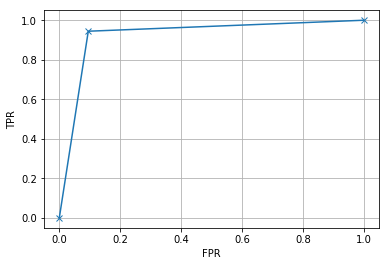

In [ ]:
print("accuracy  =%.2f"%(accuracy_score(y_test, y_pred)))
print("recall    =%.2f"%(recall_score(y_test, y_pred, average='macro')))
print("presicion =%.2f"%(precision_score(y_test, y_pred, average='macro')))
print("F1score   =%.2f"%(f1_score(y_test, y_pred, average='macro')))
print("ROC-AUC   =%.2f"%(roc_auc_score(y_test, y_pred)))
fpr,tpr,thresholds=roc_curve(y_test, y_pred, drop_intermediate=False)
plt.plot(fpr, tpr, marker="x")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.grid()
plt.show()

# 分類結果
ここではクラスごとに適合率・再現率・F値・総数を出力する

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.90      0.90      0.90        63
         1.0       0.94      0.94      0.94       108

    accuracy                           0.93       171
   macro avg       0.92      0.92      0.92       171
weighted avg       0.93      0.93      0.93       171



# 標準正規化(標準化)
データセットの項目(特徴量)に対して平均値を0で分散を1に変換する。

以下同じ操作を行う

In [ ]:
Sscale = StandardScaler()
Sscale.fit(x)
xs = Sscale.transform(x)
xs

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(xs, y, random_state=1, test_size=0.3)

In [ ]:
model = LR()
model.fit(x_train, y_train)

LogisticRegression()

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
con = pd.DataFrame(confusion_matrix(y_test, y_pred))
con.index = ["陰性","陽性"]
con.columns = ["陰性","陽性"]
con

,陰性,陽性
陰性,61,2
陽性,3,105


accuracy  =0.97
recall    =0.97
presicion =0.97
F1score   =0.97
ROC-AUC   =0.97


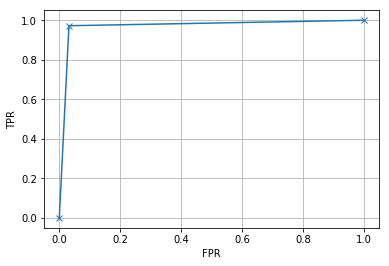

In [ ]:
print("accuracy  =%.2f"%(accuracy_score(y_test, y_pred)))
print("recall    =%.2f"%(recall_score(y_test, y_pred, average='macro')))
print("presicion =%.2f"%(precision_score(y_test, y_pred, average='macro')))
print("F1score   =%.2f"%(f1_score(y_test, y_pred, average='macro')))
print("ROC-AUC   =%.2f"%(roc_auc_score(y_test, y_pred)))
fpr,tpr,thresholds=roc_curve(y_test, y_pred, drop_intermediate=False)
plt.plot(fpr, tpr, marker="x")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.grid()
plt.show()

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.95      0.97      0.96        63
         1.0       0.98      0.97      0.98       108

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171



# 最大最小正規化(正規化)
項目(特徴量)に対して最大値を1で最小値を0にすることで尺度を合わせる。

In [ ]:
Mscale = MinMaxScaler()
Mscale.fit(x)
xm = Sscale.transform(x)
xm

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(xm, y, random_state=1, test_size=0.3)

In [ ]:
model = LR()
model.fit(x_train, y_train)

LogisticRegression()

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
con = pd.DataFrame(confusion_matrix(y_test, y_pred))
con.index = ["陰性", "陽性"]
con.columns = ["陰性", "陽性"]
con

,陰性,陽性
陰性,61,2
陽性,3,105


accuracy  =0.97
recall    =0.97
presicion =0.97
F1score   =0.97
ROC-AUC   =0.97


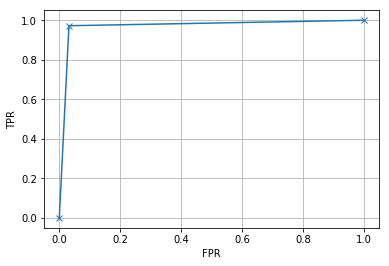

In [ ]:
print("accuracy  =%.2f"%(accuracy_score(y_test, y_pred)))
print("recall    =%.2f"%(recall_score(y_test, y_pred, average='macro')))
print("presicion =%.2f"%(precision_score(y_test, y_pred, average='macro')))
print("F1score   =%.2f"%(f1_score(y_test, y_pred, average='macro')))
print("ROC-AUC   =%.2f"%(roc_auc_score(y_test, y_pred)))
fpr,tpr,thresholds=roc_curve(y_test, y_pred, drop_intermediate=False)
plt.plot(fpr, tpr, marker="x")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.grid()
plt.show()

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.95      0.97      0.96        63
         1.0       0.98      0.97      0.98       108

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171

